# Benchmarking Our Algorithm against others

In [140]:
import sys
sys.path.append('../')
from panav.environment.env import MultiTunnelEnv
from panav.hybrid import HybridGraph

from panav.sequential import sequential_HybridSIPP

from panav.PBS.PBS_hybrid_SIPP import PBS_hybrid_SIPP

from panav.viz import draw_hybrid



from time import time

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [145]:

bloating_r = 0.5
vmax = 1.0

N = 8
limits = [(-10,10),(-10,10)] 
n_tunnel = 1

TIMEOUT = 100 # timeout



env = MultiTunnelEnv(n_tunnel = n_tunnel, tunnel_width = bloating_r*3.9,limits=limits, N_agent = N)

shuffled_idx = np.random.permutation(N)
# shuffled_idx  = np.arange(N)
env.starts = env.starts[shuffled_idx]
env.goals = env.goals[shuffled_idx]
env.calc_start_goal_regions()

HG = HybridGraph(env,bloating_r,tunnel_end_point_buffer=0.3)



/Users/tianpengzhang/opt/miniconda3/envs/PA-NAV/lib/python3.11/site-packages/shapely/measurement.py:74: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)
/Users/tianpengzhang/opt/miniconda3/envs/PA-NAV/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


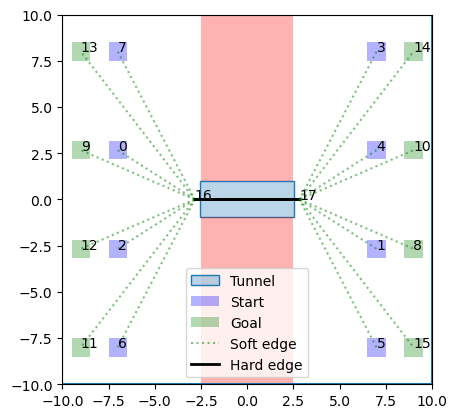

In [146]:
draw_hybrid(HG,display_soft=True)

In [150]:
gp[0]

[(0, 0),
 (16, 5.541949397549563),
 (17, 11.204449397549563),
 (8, 19.574825763702393)]

In [147]:
continuous_plans,gp = sequential_HybridSIPP(HG,return_graph=True)

0
Infinite interval [0,inf]
Infinite interval [0,inf]
Infinite interval [0,inf]
1


/Users/tianpengzhang/opt/miniconda3/envs/PA-NAV/lib/python3.11/site-packages/cvxpy/problems/problem.py:1391: UserWarning: 
    The problem is either infeasible or unbounded, but the solver
    cannot tell which. Disable any solver-specific presolve methods
    and re-solve to determine the precise problem status.

    For GUROBI and CPLEX you can automatically perform this re-solve
    with the keyword argument prob.solve(reoptimize=True, ...).
    
  warnings.warn(INF_OR_UNB_MESSAGE)


MILP low-level encounters infeasibility.
Infinite interval [14.204449397549563,inf]
Infinite interval [14.204449397549563,inf]
Infinite interval [14.204449397549563,inf]
Infinite interval [0,inf]
Infinite interval [0,inf]
2
MILP low-level encounters infeasibility.
Infinite interval [22.866949397548375,inf]
Infinite interval [22.866949397548375,inf]
Infinite interval [22.866949397548375,inf]
Infinite interval [0,inf]
Infinite interval [0,inf]
3
MILP low-level encounters infeasibility.
Infinite interval [21.79385337105765,inf]
Infinite interval [21.79385337105765,inf]
Infinite interval [21.79385337105765,inf]
Infinite interval [21.79385337105765,inf]
Infinite interval [0,inf]
Infinite interval [0,inf]
4
MILP low-level encounters infeasibility.
Infinite interval [24.793853371055306,inf]
Infinite interval [24.793853371055306,inf]
Infinite interval [24.793853371055306,inf]
Infinite interval [0,inf]
Infinite interval [0,inf]
5
MILP low-level encounters infeasibility.
Infinite interval [27.79

In [148]:
from matplotlib import pyplot as plt
from panav.viz import animation,interpolate_positions

from IPython.display import HTML, display
from matplotlib import rcParams
import numpy as np

plans = np.array(continuous_plans)

exec_tau = 1.0
dt = exec_tau * 0.25
pos_to_ani = []
for cp in plans:
    _,xs = interpolate_positions(*cp,dt)
    pos_to_ani.append(xs)


rcParams['animation.embed_limit'] = 2**128

anim = animation(HG.env, pos_to_ani, bloating_r, dt = dt)
display(HTML(anim.to_jshtml()))
plt.close() 

/var/folders/4v/bq7m33xj6b9fm2jfm0ngdg3c0000gn/T/ipykernel_83516/2126884685.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plans = np.array(continuous_plans)
